# Telco Customer Churn Prediction (EDA)


The primary objective of this project is to develop a machine learning model to predict customer churn for a California-based telecommunications company. By leveraging historical customer data, we aim to identify patterns and behaviors indicative of a customer's likelihood to discontinue their service.

This is a supervised learning classification problem. The dataset is labeled, with the target variable `Churn Value` indicating whether a customer has left the service (1) or not (0). To evaluate the model's performance, we will use a set of classification metrics appropriate for potentially imbalanced datasets, including:
- Accuracy: The proportion of total correct predictions.
- Recall: The proportion of actual positives that were identified correctly.
- Precision: The proportion of positive identifications that were actually correct.
- F1-Score: The harmonic mean of Precision and Recall, providing a single score that balances both.
- Area Under the Receiver Operating Characteristic Curve (ROC-AUC): Measures the model's ability to distinguish between classes.

### Methodology
This project will adhere to the Cross-Industry Standard Process for Data Mining (CRISP-DM) methodology. This framework provides a structured approach to data mining projects, ensuring that the process is well-documented, repeatable, and aligned with business objectives.
The methodology consists of the following phases:
1. Business Understanding: Defining the project objectives from a business perspective.
2. Data Understanding: Collecting, describing, and exploring the initial data.
3. Data Preparation: Cleaning, transforming, and engineering features from the raw data.
4. Modeling: Selecting and applying various modeling techniques.
5. Evaluation: Evaluating the model's performance against the business success criteria.

### Project Scope
This notebook will cover the initial and most critical phases of the project: Business Understanding and Data Understanding.

- Business Understanding: In this phase, we translate the business challenge into a data science problem definition. The goal is to comprehend the project's objectives and requirements from a business perspective, ensuring the final solution delivers tangible value.    
- Data Understanding: This phase begins with an initial data collection and proceeds with activities to get familiar with the data, identify data quality problems, and discover first insights. It consists of two main sub-steps: Descriptive Analysis, where we compute summary statistics to understand the basic features of the data, and Exploratory Data Analysis (EDA), where we use visualization techniques to uncover patterns, spot anomalies, and test hypotheses.

I invite you to proceed with the following sections to gain a comprehensive understanding of the business context and the foundational data analysis that will guide the modeling efforts.



___

# 1. Business Understanding

### Business Problem
During the third quarter (Q3) of the current fiscal year, a Telco Company, prominent provider of home telephone and internet services across California, encountered a significant challenge. At the outset of this period, the company served over 7,000 consumers; however, the company observed an alarming customer exodus of 26.53%. 

### Contextual Understanding of Churn
This high rate of customer attrition poses a substantial threat to the company's stability and growth. Customer churn, also known as customer attrition, refers to the phenomenon where customers cease doing business with a company. In the subscription-based model of the telecommunications industry, churn is a critical metric that directly impacts revenue streams.
The consequences of a high churn rate are multifaceted:
- Direct Revenue Loss: Each lost customer represents a loss of recurring monthly revenue.
Increased Acquisition Costs: Acquiring a new customer is widely reported to be 5 to 25 times more expensive than retaining an existing one. A high churn rate forces the company to increase its marketing and sales expenditures to simply maintain its market share.
- Brand Reputation Damage: High churn can signal market dissatisfaction with services, pricing, or customer support, potentially damaging the brand's reputation and deterring new prospects.
Therefore, understanding the reasons behind churn and proactively identifying at-risk customers is not just a strategic advantage but a business necessity.

**Key Perfomance Indicators (KPIs)**         
The problem of churn is directly linked to several core business KPIs:
- Customer Churn Rate: The primary indicator of the problem. The goal is to reduce this percentage significantly.
-Customer Satisfaction Score (CSAT): Measures direct satisfaction with a specific product or service. For telecommunications companies, this could be satisfaction after a support call, an installation, or the experience with internet speed. Low CSAT scores for recurring issues (e.g., slow internet, dropped calls, billing issues) are key churn risk factors.
-Customer Lifetime Value (CLV): This is the total revenue a customer is expected to generate over the course of their relationship with your company. Churn directly impacts CLV, as lost customers do not contribute any future revenue. Analyzing the CLV of lost customers compared to retained ones can highlight the financial cost of churn.

### Expected Benefits
By successfully completing this project, the company expects to achieve significant benefits from both a business and a data science perspective. 

**From a business perspective, the company aims to:**
- **Identify the main churn risk factors**: Discover which customer characteristics or behaviors are most strongly linked to leaving the company, providing crucial insights for the Telco.
- **Identify high-risk customers**: Understand the profile of customers who have a high probability of canceling their services soon. This segmentation is fundamental for directing retention efforts.
- **Develop personalized retention strategies**: Based on the identified risk factors and groups, specific actions will be proposed to retain these customers. This can include everything from discounts and personalized plans to proactive support or exclusive benefits.
- **Provide an interpretable model that allows stakeholders to understand why a customer is flagged as high-risk.**
  
**From a data science perspective, the project's goal is to:**
- Recall of at least 70% for customers who churned.
- Precision of at least 60% for customers predicted to churn
- AUC-ROC of over 0.75.

### Conclusion
In summary, addressing the 27% churn rate is a strategic business imperative. By framing the issue as a data science problem, we can move from a reactive to a proactive stance. This phase has established a clear understanding of the business context, its financial implications, and the desired outcomes. The next step, Data Understanding, will delve into the available data to uncover the initial insights that will form the basis of our predictive model.

___

# 2. Data Understanding

In this section, we will load the dataset and perform an initial analysis to understand its structure, content, and quality. This process is divided into two parts: Descriptive Analysis and Exploratory Data Analysis (EDA).

- The dataset used in this project is available at [Kaggle](https://www.kaggle.com/datasets/yeanzc/telco-customer-churn-ibm-dataset) in the spreadsheet format.
- The data used in this project is originally part of the sample databases available in *Cognos Analytics*, a business intelligence tool with AI capabilities developed by IBM.

In [130]:
# Importing libraries.
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

from utils import print_structure_report
from plots import eda_map, eda_plots

# Ignore all warnings.
warnings.filterwarnings('ignore')

# Chart settings.
%matplotlib inline
mpl.style.use('petroff10')
mpl.rcParams['font.size']           =  12
mpl.rcParams['axes.grid']           =  False
mpl.rcParams['figure.dpi']          =  150
mpl.rcParams['xtick.color']         = 'black'
mpl.rcParams['ytick.color']         = 'black'
mpl.rcParams['axes.titlesize']      =  11
mpl.rcParams['axes.linewidth']      =  1
mpl.rcParams['ytick.labelsize']     =  9
mpl.rcParams['xtick.labelsize']     =  9

# 2.1 Descriptive Analysis

The purpose of this initial analysis is to perform a basic "health check" on the dataset. This involves summarizing its main characteristics, identifying potential data quality issues, and understanding the fundamental properties of each attribute.


In [131]:
telco = pd.read_excel("Telco_customer_churn.xlsx")

In [132]:
telco.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


| Feature | Meaning |
| :--- | :--- |
| `CustomerID` | A unique ID that identifies each customer. | 
| `Count` | A value used in reporting/dashboarding to sum up the number of customers in a filtered set. |
| `Country` | The country of the customer’s primary residence. | 
| `State` | The state of the customer’s primary residence. | 
| `City` | The city of the customer’s primary residence. | 
| `Zip Code` | The zip code of the customer’s primary residence. | 
| `Lat Long` | The combined latitude and longitude of the customer’s primary residence. | 
| `Latitude` | The latitude of the customer’s primary residence. | 
| `Longitude` | The longitude of the customer’s primary residence. | 
| `Gender` | The customer’s gender. | 
| `Senior Citizen` | Indicates if the customer is 65 or older. | 
| `Partner` | Indicate if the customer has a partner. | 
| `Dependents` | Indicates if the customer lives with any dependents. Dependents could be children, parents, grandparents, etc. | 
| `Tenure Months` | Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above. | 
| `Phone Service` | Indicates if the customer subscribes to home phone service with the company. |
| `Multiple Lines` | Indicates if the customer subscribes to multiple telephone lines with the company. |
| `Internet Service` | Indicates if the customer subscribes to Internet service with the company. |
| `Online Security` | Indicates if the customer subscribes to an additional online security service provided by the company. |
| `Online Backup` | Indicates if the customer subscribes to an additional online backup service provided by the company. |
| `Device Protection` | Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company. |
| `Tech Support` | Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times. |
| `Streaming TV` | Indicates if the customer uses their Internet service to stream television programing from a third party provider. The company does not charge an additional fee for this service. |
| `Streaming Movies` | Indicates if the customer uses their Internet service to stream movies from a third party provider. The company does not charge an additional fee for this service. |
| `Contract` | Indicates the customer’s current contract type. |
| `Paperless Billing`| Indicates if the customer has chosen paperless billing. |
| `Payment Method` | Indicates how the customer pays their bill. |
| `Monthly Charge` | Indicates the customer’s current total monthly charge for all their services from the company. |
| `Total Charges` | Indicates the customer’s total charges, calculated to the end of the quarter specified above. |
| `Churn Label` | Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value. |
| `Churn Value` | 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label. |
| `Churn Score` | A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn. |
| `CLTV` | Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn. |
| `Churn Reason` | A customer’s specific reason for leaving the company. Directly related to Churn Category. |

Invoking the `print_structure_report` function yields a holistic data overview, synthesizing the outputs traditionally provided by shape, info, describe, isnull, and duplicated methods.

In [133]:
print_structure_report(telco)

                                                               Data Structure Report
Summary:
• The dataset has 7043 observations and 33 features.
• There are 5174 missing values in ['Churn Reason'].
• There are no duplicated values in the dataset.
• There are 24 categorical features, 9 numerical features, and 0 boolean features.

Categorical Features: 24
Features                  Unique Values Count       Unique Values            
------------------------- ------------------------- --------------------------------------------------------------------------------------------------
CustomerID                7043                      Too many values          
Country                   1                         United States            
State                     1                         California               
City                      1129                      Too many values          
Lat Long                  1652                      Too many values          
Gender                 

Here's what we've gathered about the dataset:

- The dataset comprises 7,043 consumer records across 33 features.
- Missing data is exclusively found in the 'Churn Reason' column, which makes sense as this information would only be available for customers who have already churned.
- The majority of features are of the object data type. These will require pre-processing before they can be effectively used in the machine learning model.


### Feature Management

Several features will be removed from the dataset for the following reasons:

- `Customer ID`: This column contains a unique identifier for each customer. It will be removed as it provides no analytical value for model training or insights.
- `Country` and `State`: Both of these features contain only a single unique value (United States and California, respectively). They offer no variability for analysis and will therefore be excluded.
- `Lat Long`: This feature represents a combined value of latitude and longitude. Since more granular geographic information is not required for this analysis, it will be removed.
- `Zip Code`: Inherently represent a geographical area that can largely be inferred from precise latitude and longitude coordinates, along with the city.
- `Churn Label`: This column is a categorical representation of the data already present in the `Churn Value` feature, making it redundant for our purposes.
- `Count`: This column contains the value '1' for every record, offering no analytical variation or utility. It will be discarded.
- `Churn Score`: This feature calculates the probability of a customer churning soon. As the machine learning model we are building will also be capable of providing this predictive information, this redundant feature will be removed.

One feature will undergo transformation:
- `Total Charges`: It is currently stored as an object data type and must be converted to a numeric type to be usable in our analysis.

This transformation applies to this current data description step.
During the modeling process, we will perform another analysis to see if any of this information might be relevant to the model.

In [134]:
remove = ['CustomerID', 'Country', 'State', 'Lat Long', 'Zip Code','Churn Label', 'Count', 'Churn Score']
change = ['Total Charges']

In [135]:
df = telco.copy()
df.drop(remove, axis=1, inplace=True)

if any(col in df.columns for col in remove): 
    print('The columns were not removed.')
else:
    print('The columns were removed successfully.')

for col in change:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    count = df[col].isna().sum()
    if count == 0:
        print(f'The column "{col}" was changed successfully.') 
    else:
        print(f'{count} records in "{col}" were found empty after conversion.') 

The columns were removed successfully.
11 records in "Total Charges" were found empty after conversion.


Some strings were not transformed to an integer. Let's check in which indexes this problem occurred to solve it.

In [136]:
null_mask = df['Total Charges'].isnull()
null_index = df[null_mask].index.to_list()
print(null_index)

[2234, 2438, 2568, 2667, 2856, 4331, 4687, 5104, 5719, 6772, 6840]


In [137]:
telco.loc[null_index]

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
2234,4472-LVYGI,1,United States,California,San Bernardino,92408,"34.084909, -117.258107",34.084909,-117.258107,Female,...,Two year,Yes,Bank transfer (automatic),52.55,,No,0,36,2578,NaN
2438,3115-CZMZD,1,United States,California,Independence,93526,"36.869584, -118.189241",36.869584,-118.189241,Male,...,Two year,No,Mailed check,20.25,,No,0,68,5504,NaN
2568,5709-LVOEQ,1,United States,California,San Mateo,94401,"37.590421, -122.306467",37.590421,-122.306467,Female,...,Two year,No,Mailed check,80.85,,No,0,45,2048,NaN
2667,4367-NUYAO,1,United States,California,Cupertino,95014,"37.306612, -122.080621",37.306612,-122.080621,Male,...,Two year,No,Mailed check,25.75,,No,0,48,4950,NaN
2856,1371-DWPAZ,1,United States,California,Redcrest,95569,"40.363446, -123.835041",40.363446,-123.835041,Female,...,Two year,No,Credit card (automatic),56.05,,No,0,30,4740,NaN
4331,7644-OMVMY,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Two year,No,Mailed check,19.85,,No,0,53,2019,NaN
4687,3213-VVOLG,1,United States,California,Sun City,92585,"33.739412, -117.173334",33.739412,-117.173334,Male,...,Two year,No,Mailed check,25.35,,No,0,49,2299,NaN
5104,2520-SGTTA,1,United States,California,Ben Lomond,95005,"37.078873, -122.090386",37.078873,-122.090386,Female,...,Two year,No,Mailed check,20.00,,No,0,27,3763,NaN
5719,2923-ARZLG,1,United States,California,La Verne,91750,"34.144703, -117.770299",34.144703,-117.770299,Male,...,One year,Yes,Mailed check,19.70,,No,0,69,4890,NaN
6772,4075-WKNIU,1,United States,California,Bell,90201,"33.970343, -118.171368",33.970343,-118.171368,Female,...,Two year,No,Mailed check,73.35,,No,0,44,2342,NaN


It appears that these customers lack recorded total charges within the DataFrame. This discrepancy could potentially be attributed to their status as new customers, lacking further charges to be appended. Let's proceed with examining this hypothesis.

In [138]:
telco['Tenure Months'].loc[null_index]

2234    0
2438    0
2568    0
2667    0
2856    0
4331    0
4687    0
5104    0
5719    0
6772    0
6840    0
Name: Tenure Months, dtype: int64

The hypothesis appears confirmed: the 'Tenure Months' column displays a value of 0. This metric represents the number of complete months a customer has been subscribed to the company's services. Customers who joined in the last month of the data collection quarter would not have completed a full month of service, thus resulting in a 0-month tenure. To preserve this data, I'll simply use the 'Monthly Charges' value to fill the 'Total Charges' field for these entries.

In [139]:
monthly_charges = telco['Monthly Charges'].loc[null_index].to_dict()
monthly_charges

{2234: 52.55,
 2438: 20.25,
 2568: 80.85,
 2667: 25.75,
 2856: 56.05,
 4331: 19.85,
 4687: 25.35,
 5104: 20.0,
 5719: 19.7,
 6772: 73.35,
 6840: 61.9}

In [140]:
df['Total Charges'].fillna(monthly_charges, inplace = True)
# Checking if the change was successful.
df['Total Charges'].loc[null_mask] 

2234    52.55
2438    20.25
2568    80.85
2667    25.75
2856    56.05
4331    19.85
4687    25.35
5104    20.00
5719    19.70
6772    73.35
6840    61.90
Name: Total Charges, dtype: float64

The problem was successfully solved. Let's apply some more changes.     

For enhanced clarity and simplification, the feature 'Churn Value' will henceforth be referred to as 'churn'. Additionally, feature names will be standardized by converting them to "snake_case" (replacing spaces with underscores and converting all letters to lowercase). This practice is highly beneficial, as it promotes consistency and machine-readability, thereby mitigating errors commonly associated with inconsistent capitalization or spaces in programming environments.

In [141]:
df.rename(columns = {'Churn Value':'churn'}, inplace = True)
df.rename(columns=lambda x: x.lower().replace(' ', '_'), inplace=True)

Upon reviewing the data structure report, it was observed that six distinct columns exhibit the recurrent value "No internet service." The unique entries within these features typically comprise "Yes," "No," and "No internet service." This redundancy has the potential to introduce complexities during the exploratory data analysis. Given that records pertaining to customers without internet services are not pertinent to our current analytical objectives for these specific columns, a preliminary transformation will be applied. 

This involves replacing all instances of "No internet service" with NaN (Not a Number), thereby excluding them from immediate consideration. During the subsequent data preparation phase for model development, a comprehensive reassessment of the optimal strategy for managing these specific instances will be conducted to ensure peak model performance.

In [142]:
cols = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']
df[cols] = df[cols].replace('No internet service', np.nan)
# Checking if the change was successful.
df[cols].nunique()

online_security      2
online_backup        2
device_protection    2
tech_support         2
streaming_tv         2
streaming_movies     2
dtype: int64

To conclude this preliminary stage, the dataset will be partitioned into distinct training and testing sets. This segregation is critically performed prior to any exploratory data analysis (EDA) to avert data leakage. Conducting EDA on the complete dataset beforehand could inadvertently bias feature engineering and model selection processes with information from the test set, leading to an overly sanguine assessment of the model's performance on unobserved data. Early isolation of the test set thus ensures a more realistic and unbiased evaluation of the model's generalization capabilities.

Churn datasets frequently exemplify imbalanced class distributions, characterized by a disproportionately small number of churned customers relative to the total customer base. Consequently, the `stratify` parameter will be set to y during the splitting process to preserve the original class proportion of the churn variable across both the training and testing subsets.

In [143]:
X = df.drop('churn', axis = 1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

In [144]:
  print(f'Shape of sets:')
  print(f'Train predictor dataset: {X_train.shape}  Train target dataset:   {y_train.shape}')
  print(f'Test predictor dataset:  {X_test.shape}  Test target dataset:    {y_test.shape}')

  print(f'\nProportions:')
  print(f'• Train Set')
  print(35 * '-')
  print(f'{y_train.value_counts(normalize=True)}')
  print(f'\n• Test Set')
  print(35 * '-')
  print(f'{y_test.value_counts(normalize=True)}')

Shape of sets:
Train predictor dataset: (5634, 24)  Train target dataset:   (5634,)
Test predictor dataset:  (1409, 24)  Test target dataset:    (1409,)

Proportions:
• Train Set
-----------------------------------
churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

• Test Set
-----------------------------------
churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


The target classes proportions were preserved.

# 2.2 Exploratory Data Analysis

With a basic understanding of the data's structure and quality, the Exploratory Data Analysis aims to dig deeper by asking specific questions about the data. The goal is to formulate and validate hypotheses about the factors that influence customer churn. This exploration will be guided by visualizing the relationships between variables. It's a essential process for validating assumptions, generating hypotheses, and informing crucial decisions regarding feature engineering and model selection, ultimately enhancing our understanding of customer churn.

In [145]:
train = pd.concat([X_train, y_train], axis = 1)
train.head()

,city,latitude,longitude,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,cltv,churn_reason,churn
4626,Apple Valley,34.424926,-117.184503,Male,No,No,No,35,No,No phone service,...,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,2782,NaN,0
4192,Glenn,39.597975,-122.032248,Male,No,Yes,Yes,15,Yes,No,...,No,No,Month-to-month,No,Mailed check,75.10,1151.55,4634,NaN,0
5457,Cottonwood,40.336392,-122.448533,Male,No,Yes,Yes,13,No,No phone service,...,No,No,Two year,No,Mailed check,40.55,590.35,2898,NaN,0
4717,Westminster,33.752591,-117.993661,Female,No,Yes,No,26,Yes,No,...,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.70,3596,NaN,0
4673,Hemet,33.734933,-117.044145,Male,No,Yes,Yes,1,Yes,No,...,No,No,Month-to-month,No,Electronic check,44.55,44.55,3408,NaN,0


While segmenting features by data type (numerical, categorical, and boolean) is a common practice in Exploratory Data Analysis (EDA) for individual exploration, a distinct approach will be adopted for this project. Rather than a singular focus on data types, the exploration will be guided by the inherent information content of the features.

The dataset naturally clusters into four distinct groups: customer demographic information, details pertaining to contracted services, contractual information, and churn-related data. Exploratory analysis will be conducted within these thematic groupings. This methodology is anticipated to yield a more coherent understanding of patterns and relationships specific to each functional area, thereby providing richer insights than a purely type-based division.

In [146]:
client_info =   ['city', 'zip_code', 'latitude', 'longitude', 'gender', 'senior_citizen', 'partner', 'dependents']
contract_info = ['tenure_months', 'contract', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges']
services_info = ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 
                 'tech_support', 'streaming_tv', 'streaming_movies']
churn_info =    ['churn', 'churn_reason']

Initially, the characteristic profile of the general customer base will be delineated. Subsequently, the analysis will transition to examining the profile of churned customers, seeking to ascertain the underlying factors that contributed to the significant abandonment of the company's services during the third quarter of this year.

## General Customer Profile

### 1) Geographic Distribution and Demographics

Within the dataset, four features convey information pertaining to customer residential locations. The exploration of location-based data is critically important for comprehending customer churn. Even geographically limited information can yield valuable insights. Location can exert influence on factors such as local competition, variations in service quality across specific areas, or even unique demographic and socioeconomic characteristics that may drive churn. By examining the distribution of churn across diverse locations, even at a granular level, it is possible to uncover geographical patterns that might indicate localized service deficiencies, targeted competitor campaigns, or specific regional preferences impacting customer satisfaction and loyalty. This understanding can subsequently inform more precise and effective retention strategies.

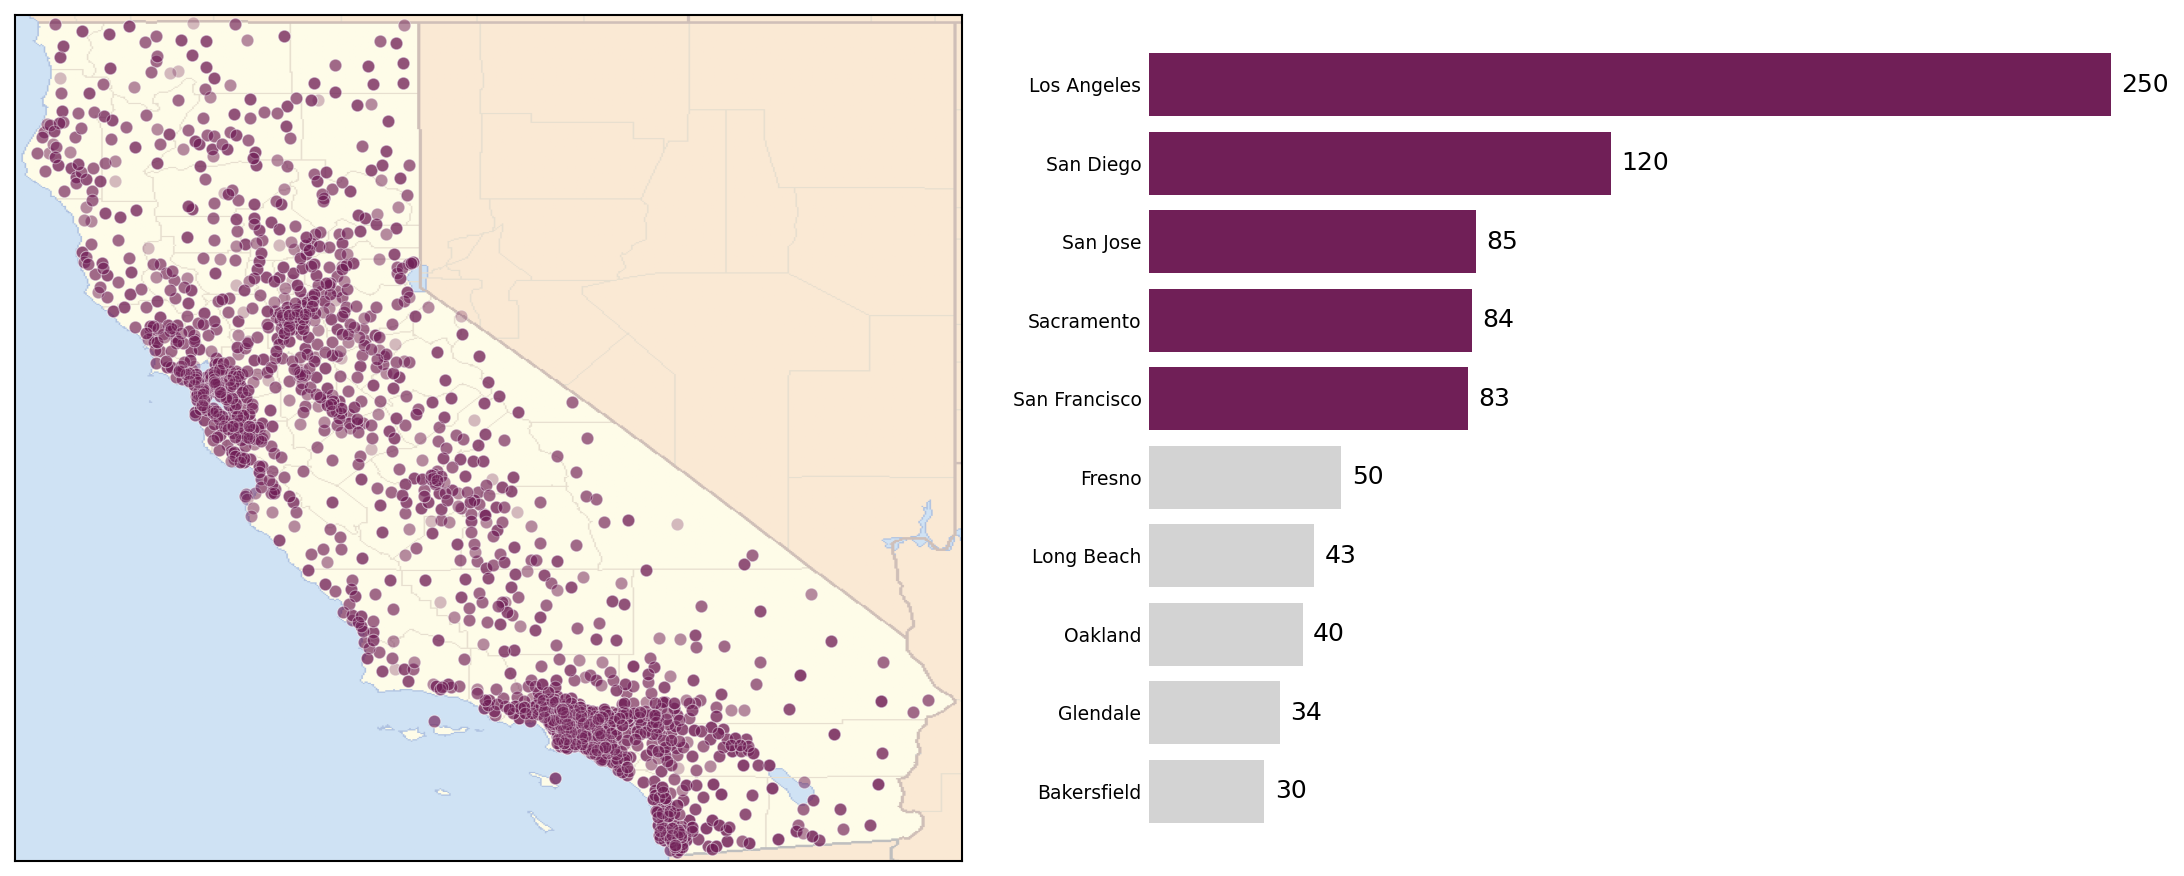

In [147]:
eda_map(data=train, x="longitude", y="latitude", figsize=(15, 6), feature_bars="city", image="california (1).png")

### Insights

- The scatter plot distinctly illustrates a high concentration of Telco customers along the coastal regions, particularly evident in Southern California (proximal to Los Angeles and San Diego) and in the Bay Area (encompassing San Francisco and San Jose). A substantial customer presence is also discernible within the Central Valley (e.g., Sacramento and Fresno).
- Conversely, the less densely populated, mountainous, and arid regions in the eastern and northern portions of the state exhibit a considerably sparser customer distribution. This pattern is characteristic for service providers, as population density is a primary driver of customer acquisition.
- Los Angeles notably emerges as the metropolitan area with the largest contingent of Telco customers, registering 250 records. This observation is consistent with its status as California's most populous city. San Diego (120 customers) and San Jose (85 customers) follow, reinforcing the conclusion that Telco's customer base is predominantly concentrated in California's major urban centers.
  
Telco's customer base demonstrates a pronounced skew towards urban and highly populated areas within California. This demographic distribution suggests that marketing initiatives, infrastructure development, and service quality enhancements should primarily be directed towards these regions. Furthermore, these findings indicate an inherent growth opportunity. It would be advantageous for the company to solidify its footprint in the high-density areas and concurrently pursue business expansion into underserved regions.

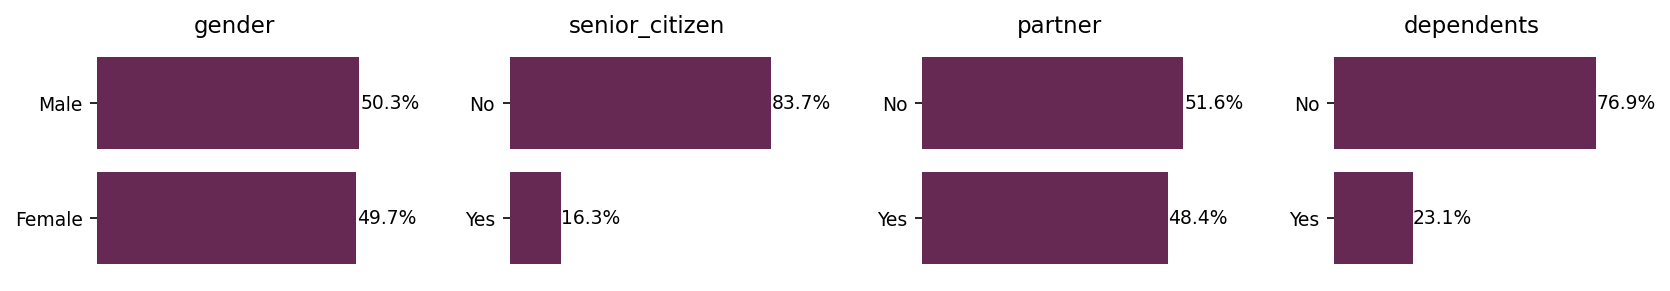

In [148]:
eda_plots(train, ['gender', 'senior_citizen', 'partner', 'dependents'], 1, 4, (13, 2), plot_type = 'bar')

### Insights

- The distribution of customers by gender demonstrates near-perfect parity, indicating no statistically significant difference in customer count between male and female segments. This indicates an absence of significant gender-based bias in either customer acquisition or retention, suggesting that Telco's services and marketing appeals are broadly inclusive across genders.
- The predominant segment of Telco's customer base comprises non-senior citizens, with senior citizens representing a comparatively minor proportion. This demographic skew may influence the types of services in demand, favoring offerings that cater to higher data consumption, advanced technological features, and digital engagement.
- Customer demographics exhibit a relatively even distribution between individuals with and without a partner, albeit with a marginal propensity towards those without a partner. Furthermore, a substantial majority of Telco's clientele does not possess dependents, constituting a segment considerably larger than that with dependents. This characteristic suggests that service packages and marketing efforts might implicitly or explicitly cater more to personal or dual-user needs, rather than extensive family-oriented plans.

### 2) Contracted Services
Subsequent to establishing the foundational demographic and geographic profiles of the customer base, this segment of the analysis will explore insights derived from features pertaining to contracted services. This phase is paramount for discerning customer engagement patterns with Telco's core offerings and for identifying specific behavioral trends that may significantly influence overall customer satisfaction and, consequently, churn propensity. 

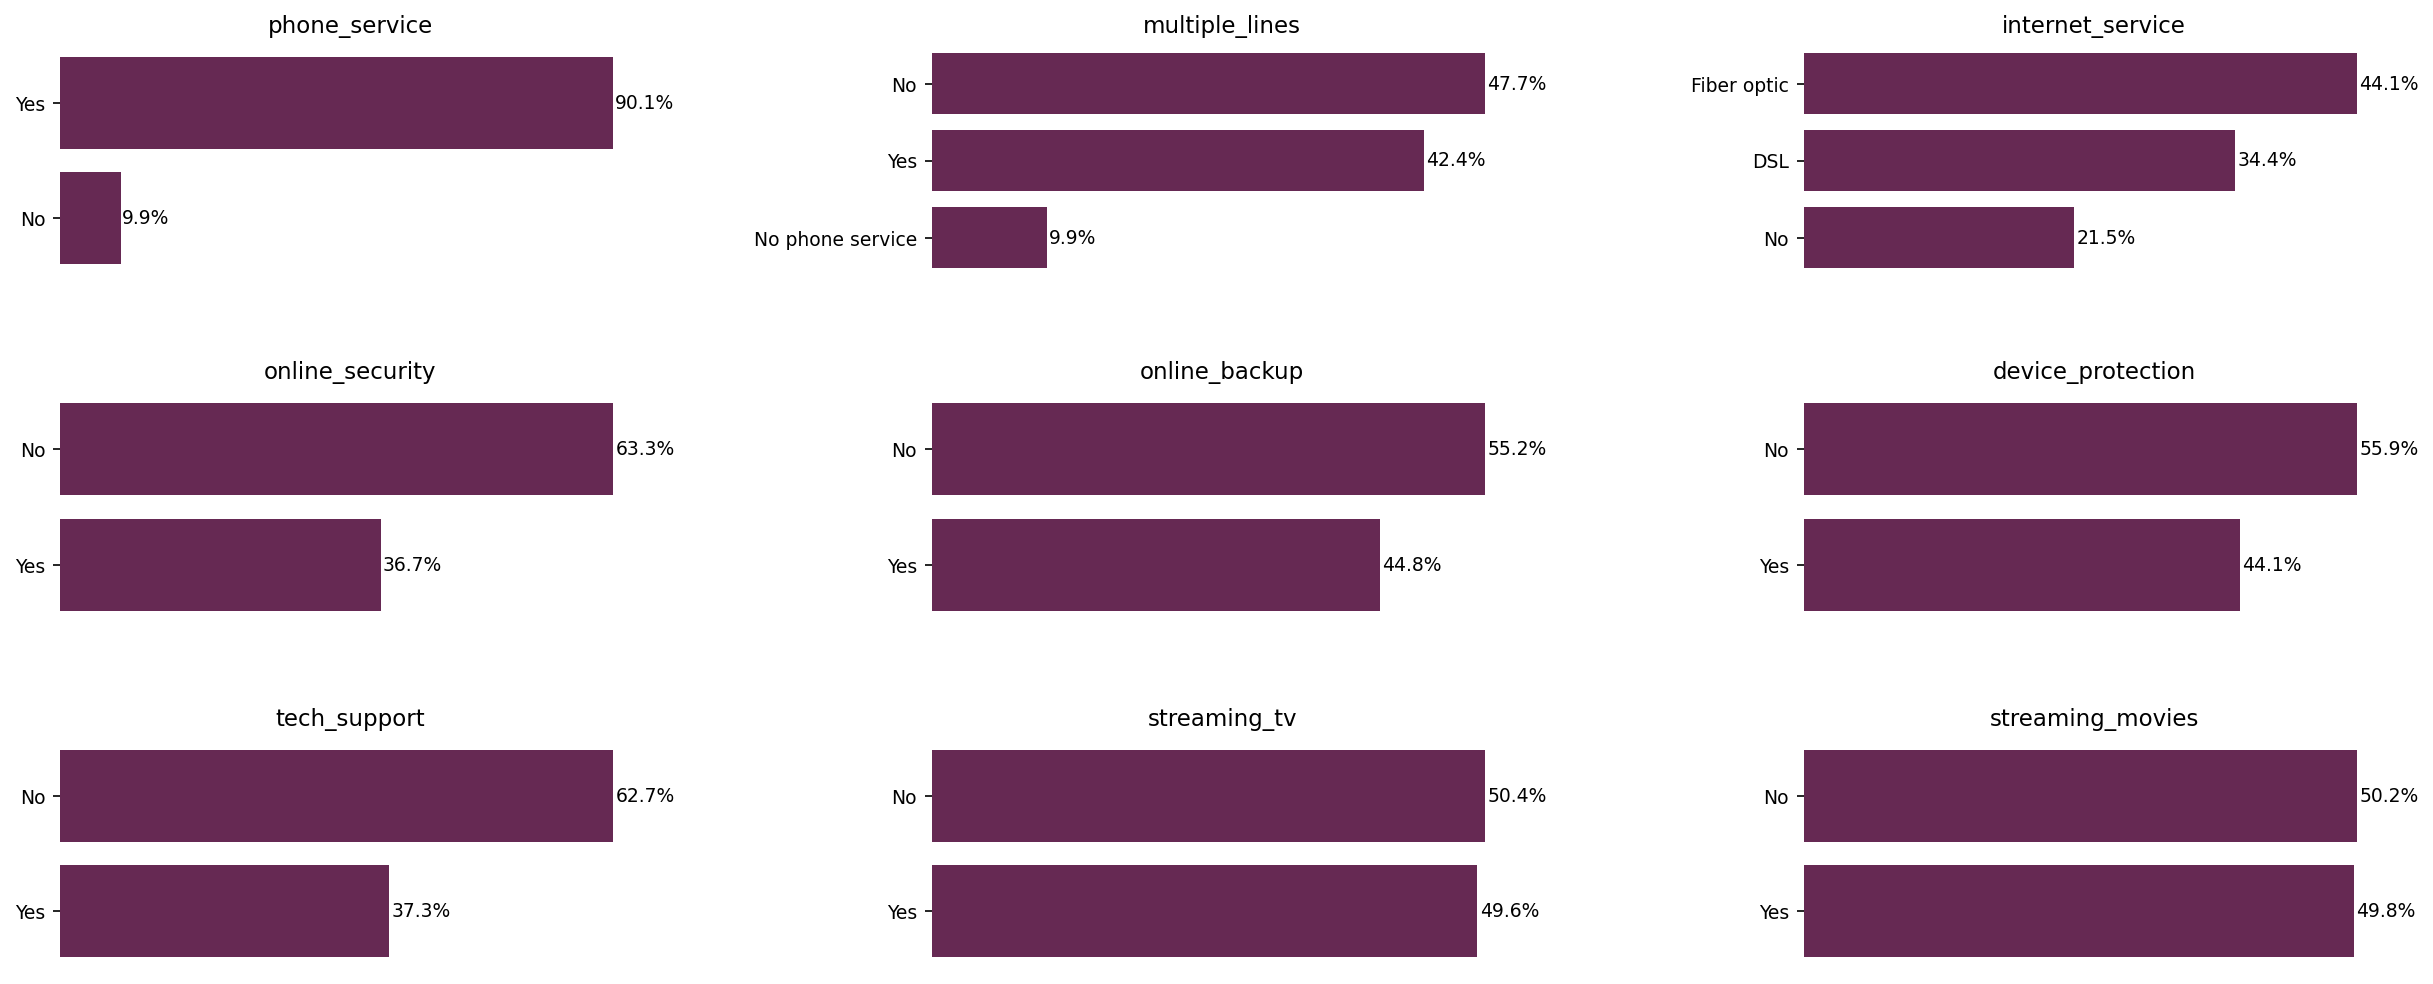

In [149]:
eda_plots(train, services_info, 3, 3, (20,8), plot_type = 'bar')

### Insights

- A preponderant majority of Telco's customer base, exceeding 90%, subscribes to phone service. This datum unequivocally establishes phone service as a foundational offering, likely representing the primary impetus for customer engagement with Telco. Its high adoption rate underscores its critical role within the company's service portfolio.
- Among customers utilizing phone service, a relatively balanced distribution is observed between those with single lines and those opting for multiple lines. While a substantial segment maintains a single line, an almost equally significant proportion subscribes to multiple lines.
- Approximately 44% of Telco's customers subscribe to internet service. Within this segment, Fiber Optic emerges as the most popular internet service option, marginally surpassing DSL. Notably, a considerable portion of the customer base, exceeding 21%, does not subscribe to any internet service. This implies that while internet connectivity constitutes a major offering, a significant segment of Telco's clientele engages solely for phone services, potentially indicating different customer segments or historical service adoption patterns.
- A clear majority of internet subscribers, approximately 63%, do not opt for online security services. Similarly, a substantial proportion (approximately 55%) foregoes online backup or device protection services. This trend suggests either a prevalent lack of perceived necessity for these additional security and backup features, unawareness of their availability or benefits, or the widespread utilization of third-party security and data protection solutions by customers.
- A significant majority of internet-enabled customers, (approximately 63%), do not subscribe to dedicated technical support. This finding is of critical importance, as the perceived absence or inadequacy of readily available technical assistance can be a substantial driver of customer dissatisfaction and, consequently, churn. It highlights a potential vulnerability in customer support engagement.
- The distribution for both streaming TV and streaming movies demonstrates an almost even split between subscribers and non-subscribers among internet-enabled customers. This observation strongly suggests a considerable interest in streaming content, indicating that these services represent a highly attractive value proposition for a substantial portion of Telco's internet-subscribing customer base.

### 3) Contractual Details and Billing

Now, our focus shifts to meticulously examining the features related to contractual information. This segment of the analysis is paramount, as it directly pertains to the terms, duration, and billing practices governing customer relationships with Telco.

Initially, we examining the categorical features pertaining to contractual agreements.

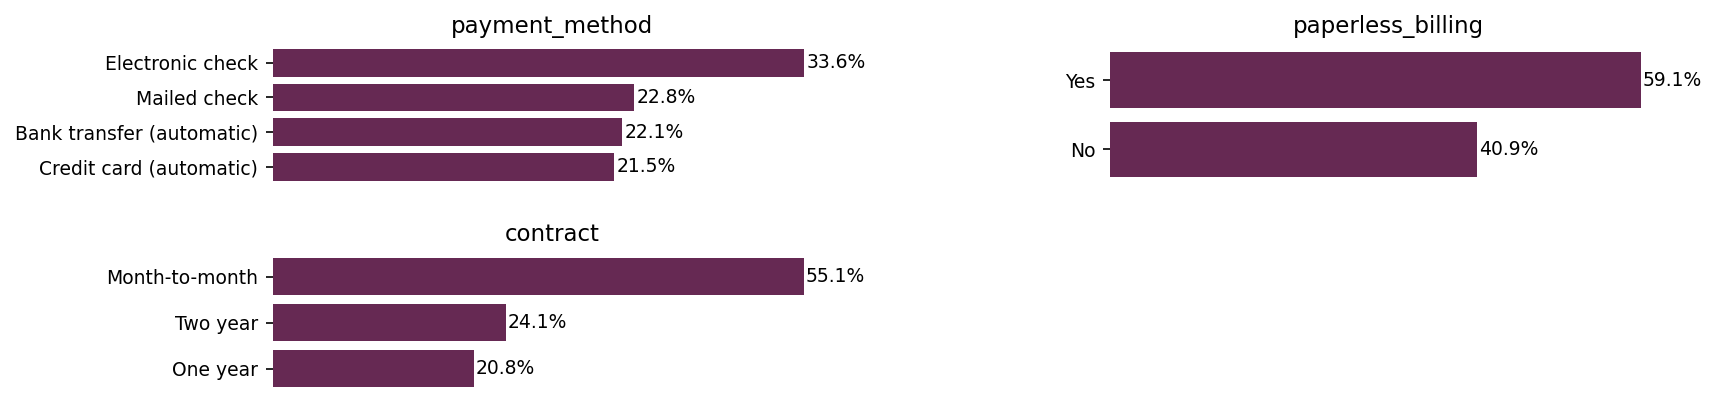

In [150]:
eda_plots(train, ['payment_method', 'paperless_billing', 'contract'], 2, 2, (12, 3), plot_type = 'bar')

### Insights

- A significant majority of Telco's customers (3102) are on a month-to-month contract. This indicates a preference for flexibility over long-term commitments, which could imply a higher churn risk given the lack of contractual lock-in. Two-year contracts are more common than one-year contracts among the committed segments.
- A clear majority of customers (3331) opt for paperless billing. This suggests a modern customer base comfortable with digital interfaces and convenience.
- Electronic check is the most popular payment method. While automatic payments (bank transfer and credit card) combined represent a large segment, mailed checks still constitute a notable portion of payments. 

We will now proceed to examine the numerical features within this group to extract pertinent insights.

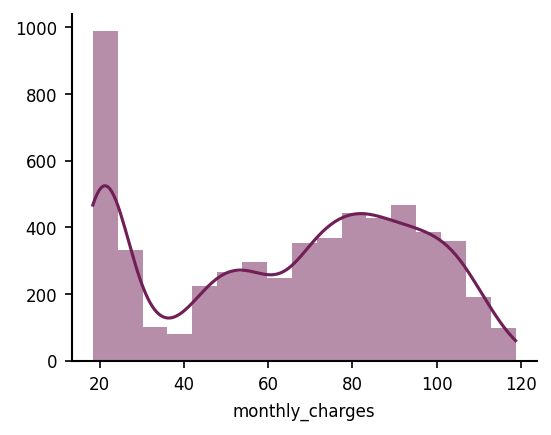

In [151]:
eda_plots(train, ['monthly_charges'], 1, 1, (4,3), plot_type = 'hist')

### Insights

- There's a very prominent peak at the lower end, suggesting a large number of customers with monthly charges around 20 dollars. This likely represents customers with basic or single services.
- A second, broader peak is observed in the $80-100 range. This segment likely corresponds to customers subscribing to bundles, higher-tier internet services (like fiber optic), or multiple additional services.

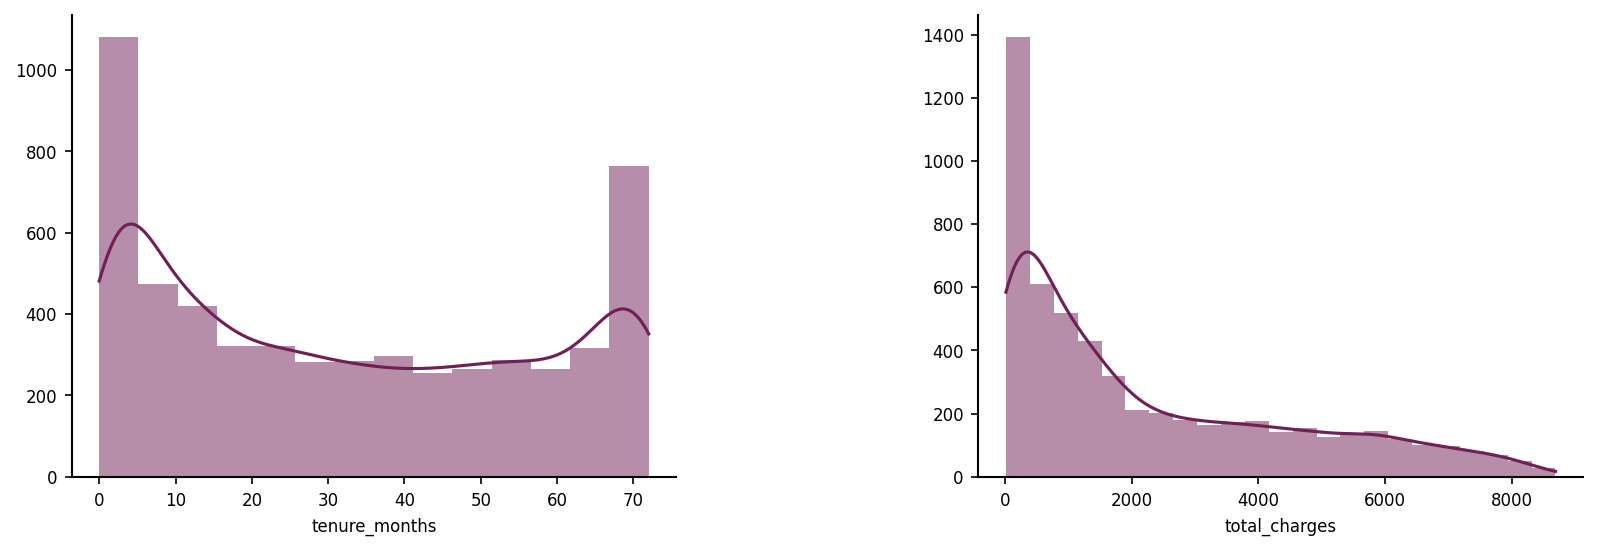

In [152]:
eda_plots(train, ['tenure_months', 'total_charges'], 1, 2, (13,4), plot_type = 'hist')

### Insights

- There is a very strong peak in the first bin of tenure_months, indicating a significant number of customers with very short tenures (0-5 months). This suggests a considerable number of new customers or customers who churn very early on. This is a critical observation regarding potential early-stage churn. The distribution of total_charges is highly skewed to the right, with a very large number of customers having low total charges. This is consistent with the high number of customers with short tenures.
- After the initial peak, the distribution is somewhat spread out across intermediate tenures (e.g., 10-60 months), showing a consistent, albeit decreasing, number of customers as tenure increases. 
- There is another notable peak at the highest tenure bin (around 70 months), indicating a significant group of long-term, loyal customers. As total_charges increase, the frequency of customers steadily decreases, forming a long tail. This is expected, as customers with higher total charges would typically have longer tenures and/or more expensive service packages.
  

### Resume
We have now concluded the initial phase of our Exploratory Data Analysis. In summary, we have successfully delineated the typical profile of Telco's consumers. 

In essence, Telco's customer base is predominantly consists of younger to middle-aged individuals, working singles or couples residing in commercial hubs.
Telephone services remain a primary offering, while internet services also represent a core component of the company's portfolio. There is a notable interest in streaming services among internet-enabled clients.

I discovered that Telco has a critical vulnerability: its customers, largely on flexible contracts, are quick to leave, particularly in the initial stages of their relationship. 

In the second phase of this analysis, we will dive deeper to find the reasons that motivate customers to leave the company’s services so quickly. Let’s start now.

## Churn Customer Profile

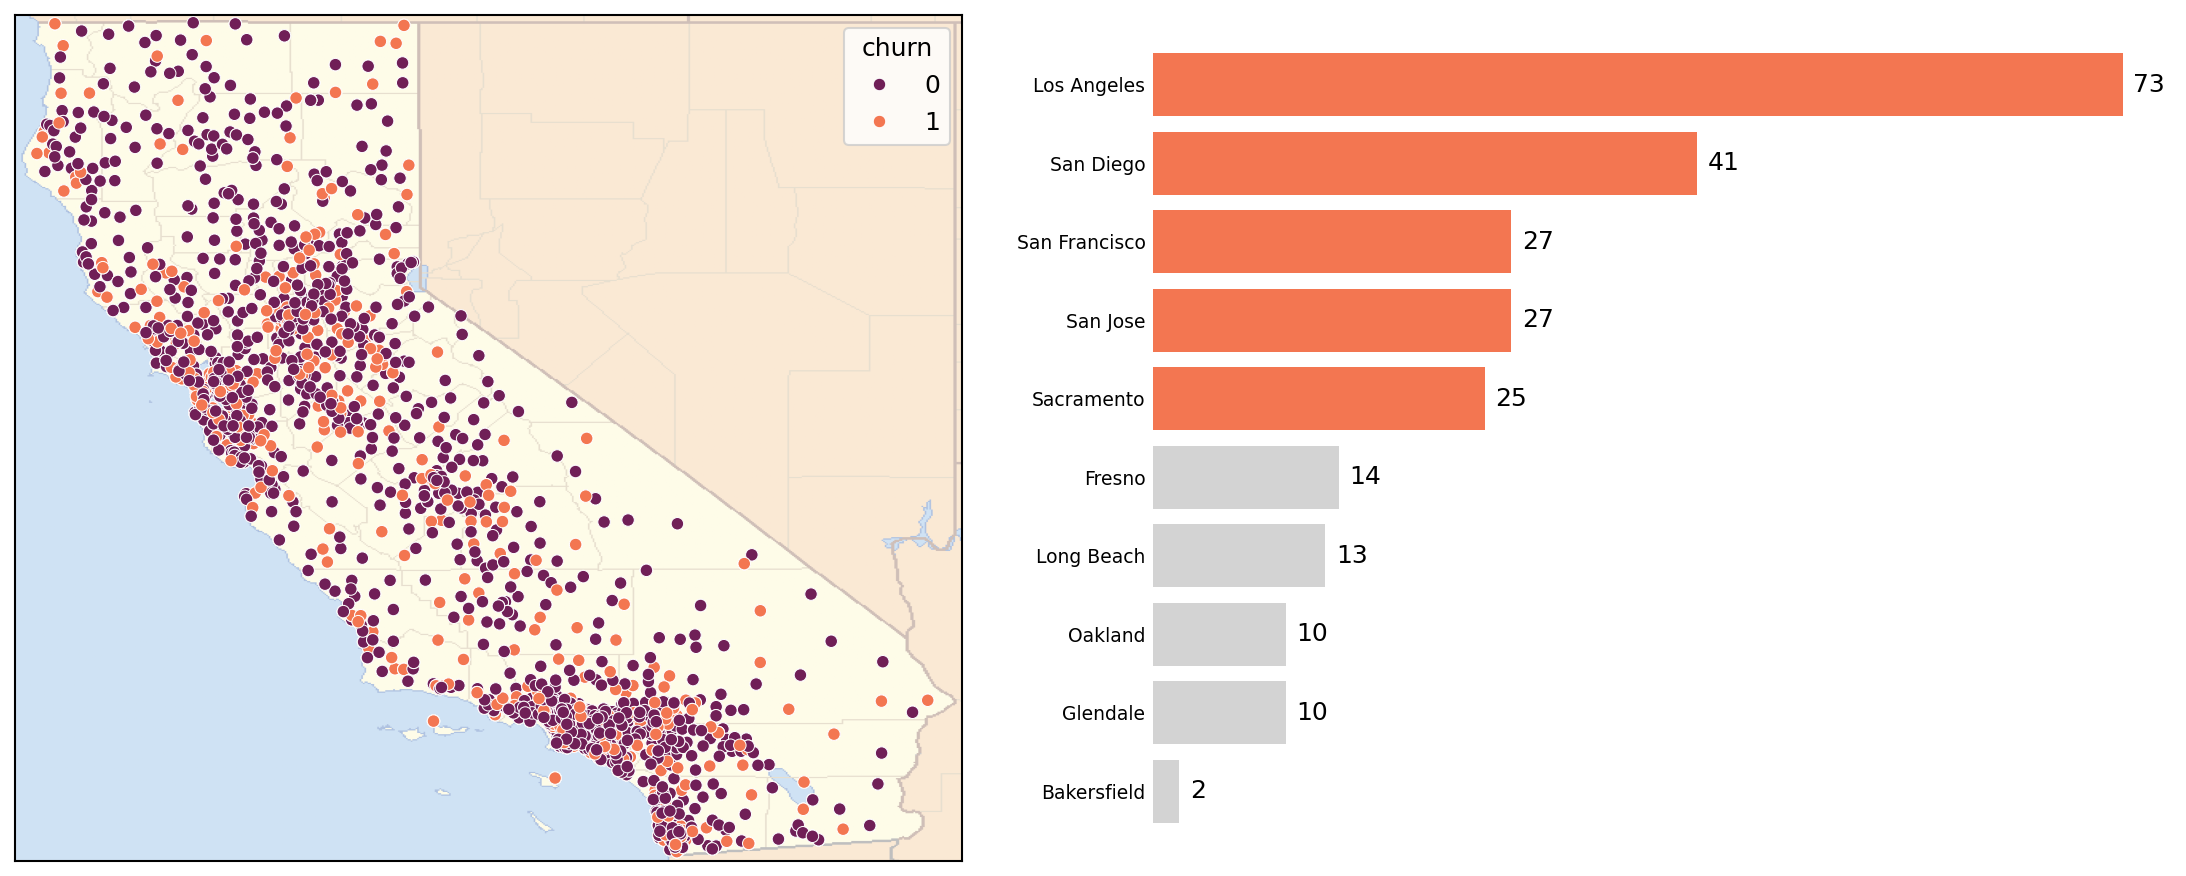

In [153]:
eda_map(data=train, x="longitude", y="latitude", figsize=(15, 6), feature_bars="city", image='california (1).png', target='churn')

The map clearly shows that churned customers are most densely concentrated in the major urban areas and coastal regions of California, particularly around Los Angeles, San Diego, and the Bay Area. This mirrors the general customer density observed previously, indicating that where Telco has more customers, it also experiences more churn in absolute terms.

However, within the context of churn analysis, it is equally imperative to assess the proportion of churned customers per region, specifically per city, rather than solely focusing on absolute churn counts. While the ten cities exhibiting the highest absolute number of churned customers may largely overlap with those possessing the highest total customer bases, their proportional churn rates could, in fact, be relatively modest. Conversely, in cities with a smaller pre-existing customer footprint, the proportional churn rate might be significantly elevated.  Therefore, our subsequent step will involve examining which cities have experienced the highest proportion of customer departures relative to their total existing customer base.

In [154]:
churn_proportion = train.groupby('city')['churn'].apply(lambda x: (x == 1).sum() / len(x)).to_frame()
churn_proportion = churn_proportion['churn'].sort_values(ascending = False).to_frame()
churn_proportion.head(20)

,churn
city,
South Lake Tahoe,1.0
Johannesburg,1.0
Panorama City,1.0
Wrightwood,1.0
Smith River,1.0
Mc Kittrick,1.0
Lemoore,1.0
Maricopa,1.0
Fort Jones,1.0


### Key Finding
It is highly probable that the cities exhibiting a churn_proportion of 1.0 contained only a singular or a very small number of consumers. This observation underscores that Telco's predominant market share, as previously identified, resides squarely within large urban and metropolitan regions.

Nevertheless, it is neither advantageous nor desirable for the company to experience complete customer attrition in areas where its market penetration is already minimal. The strategic imperative is to reinforce its presence in established high-density areas, while concurrently seeking avenues for business expansion. Possible contributors to this elevated level of churn in smaller localities may include a notable absence of targeted marketing or customer retention initiatives tailored for these groups, or, more critically, it could signify deficiencies in service quality and infrastructure provision within these specific geographical areas.

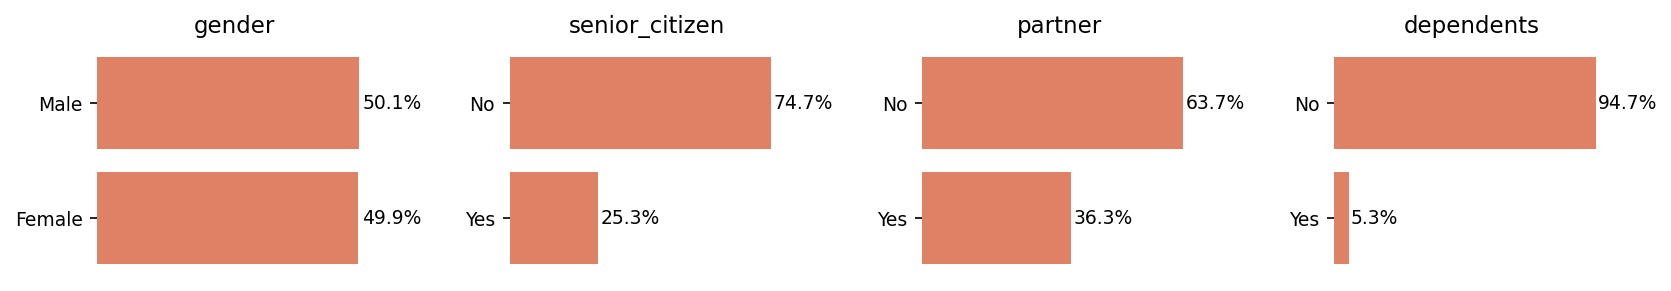

In [155]:
eda_plots(train, ['gender', 'senior_citizen', 'partner', 'dependents'], 1, 4, (13, 2), plot_type='bar', target='churn', target_value=1)

The trends identified in the analysis of Telco's overall customer profile generally persist when examining the characteristics of churned clients.

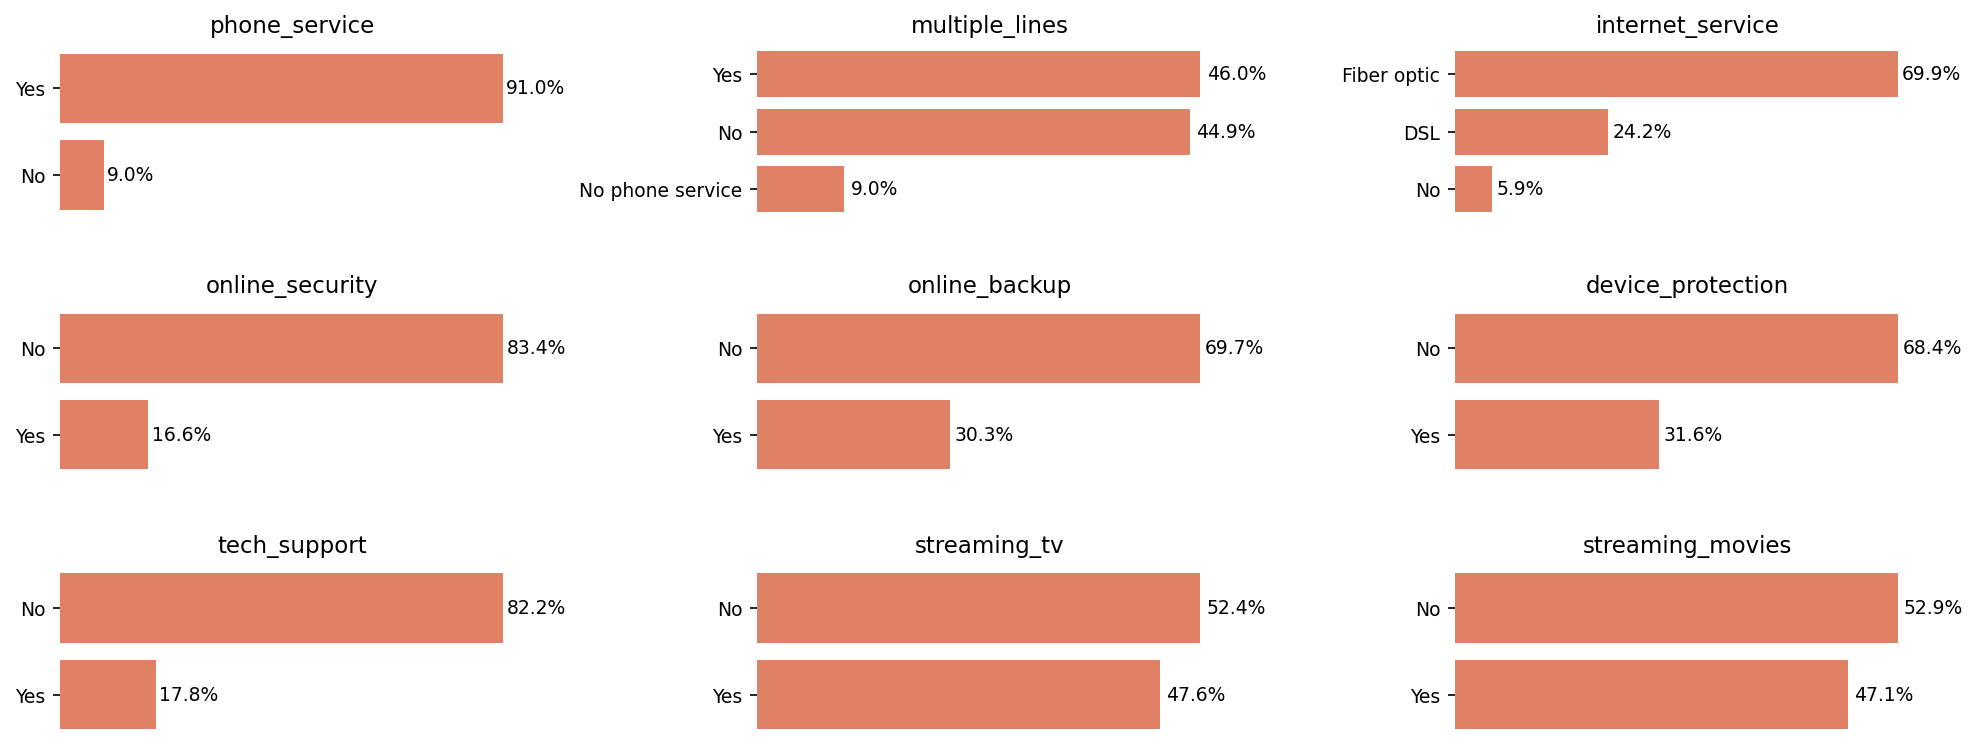

In [156]:
eda_plots(train, services_info, 3, 3, (16,6), plot_type = 'bar', target='churn', target_value=1)

### Key Findings
- Customers with Fiber Optic internet churn at an alarmingly high rate, which is more than double the rate of DSL users. Conversely, customers with no internet service have a very low churn rate. This is a critical insight indicating Fiber Optic service is a major churn driver.
- For all four of the "value-added" services (online security and backup, device protection and tech support), customers who do NOT subscribe churn at a significantly higher rate than those who do subscribe. The lowest churn rate is for those with online security, and tech support has a very similar pattern.
- While popular, subscribing to streaming services (TV or movies) does not significantly reduce churn risk compared to not subscribing. The churn rates are similar.

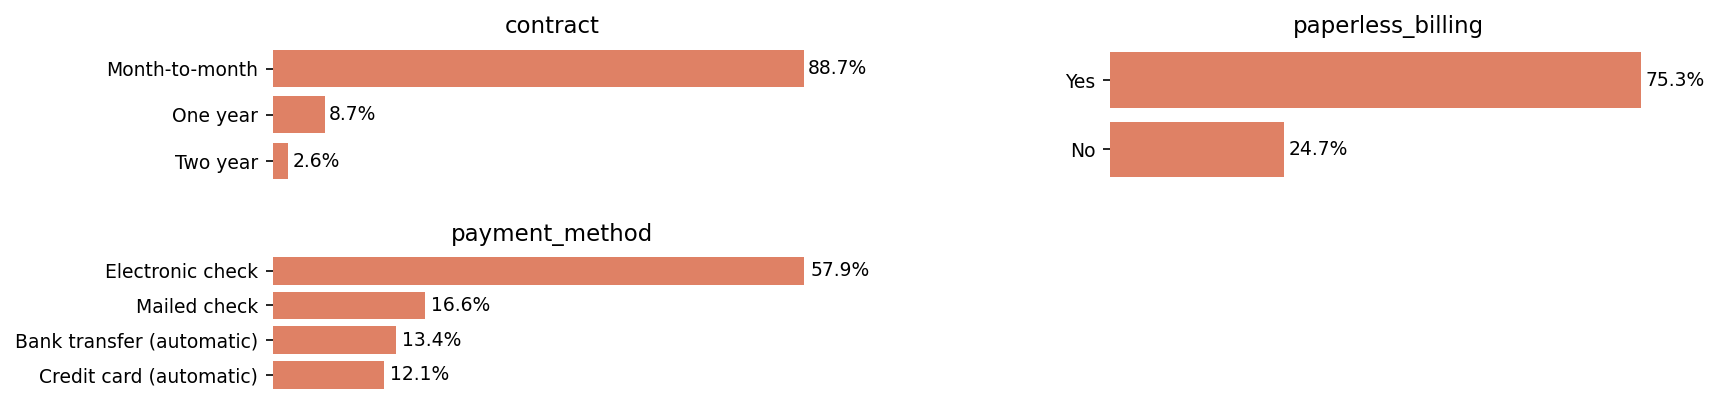

In [157]:
eda_plots(train, ['contract', 'paperless_billing', 'payment_method'], 2, 2, (12, 3), plot_type = 'bar', target='churn', target_value=1)

### Key Findings
-  Customers on month-to-month contracts churn at an extremely high rate, while those on one-year and especially two-year contracts have dramatically lower churn rates. This is a primary driver of churn.
-  Customers who use paperless billing churn at a significantly higher rate (more than double) than those who do not.
-   Customers paying via electronic check have an exceptionally high churn rate, making it the payment method most associated with churn. Automatic payment methods (bank transfer, credit card) and mailed checks show much lower churn rates.

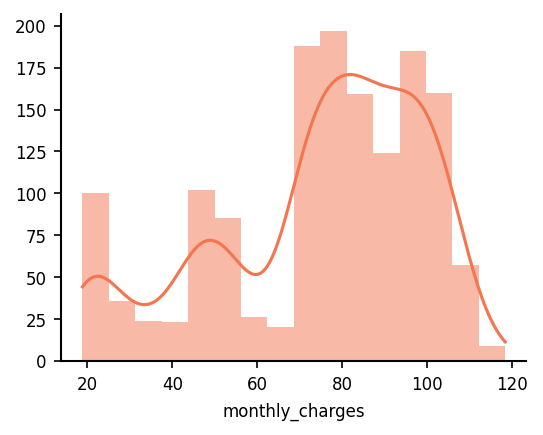

In [158]:
eda_plots(train, ['monthly_charges'], 1, 1, (4,3), plot_type = 'hist', target='churn', target_value=1)

### Key Findings
- The customers most likely to churn are those with monthly expenses between 70-100, followed by a smaller group with expenses ranging from 40-60. This analysis is crucial for the company, as it suggests that the service plans or quality of service within these price ranges may be determining factors for customer departure. Alternatively, it could indicate an unexpected increase in services contracted after a certain period of tenure with the company.

In [159]:
train['churn_reason'].unique()

array([nan, 'Attitude of support person', 'Competitor made better offer',
       'Lack of self-service on Website', 'Competitor had better devices',
       "Don't know", 'Network reliability', 'Product dissatisfaction',
       'Lack of affordable download/upload speed',
       'Competitor offered more data', 'Poor expertise of online support',
       'Attitude of service provider', 'Price too high',
       'Service dissatisfaction', 'Moved',
       'Competitor offered higher download speeds',
       'Long distance charges', 'Limited range of services',
       'Extra data charges', 'Poor expertise of phone support',
       'Deceased'], dtype=object)

To explore the reasons why consumers left the company, I will first group them into broad categories to facilitate understanding.

In [160]:
train_copy = train.copy()

def group_churn(reason):
    competitor = ['Competitor made better offer', 'Competitor had better devices', 'Competitor offered more data', 'Competitor offered higher download speeds']
    price = ['Price too high', 'Long distance charges', 'Extra data charges']
    support = ['Attitude of support person', 'Poor expertise of online support', 'Poor expertise of phone support', 'Attitude of service provider', 'Lack of self-service on Website'] 
    product = ['Lack of affordable download/upload speed', 'Network reliability', 'Product dissatisfaction', 'Service dissatisfaction', 'Limited range of services']
    others = ['Moved', 'Deceased', "Don't know"]

    if reason in competitor:
        return 'Moved to competitor'
    elif reason in price:
        return 'High price and extra charges'
    elif reason in support:
        return 'Problems with Service and Support'
    elif reason in product:
        return 'Low service quality'
    else:
        return 'Others'

train_copy['churn_reason'] = train_copy['churn_reason'].apply(group_churn)

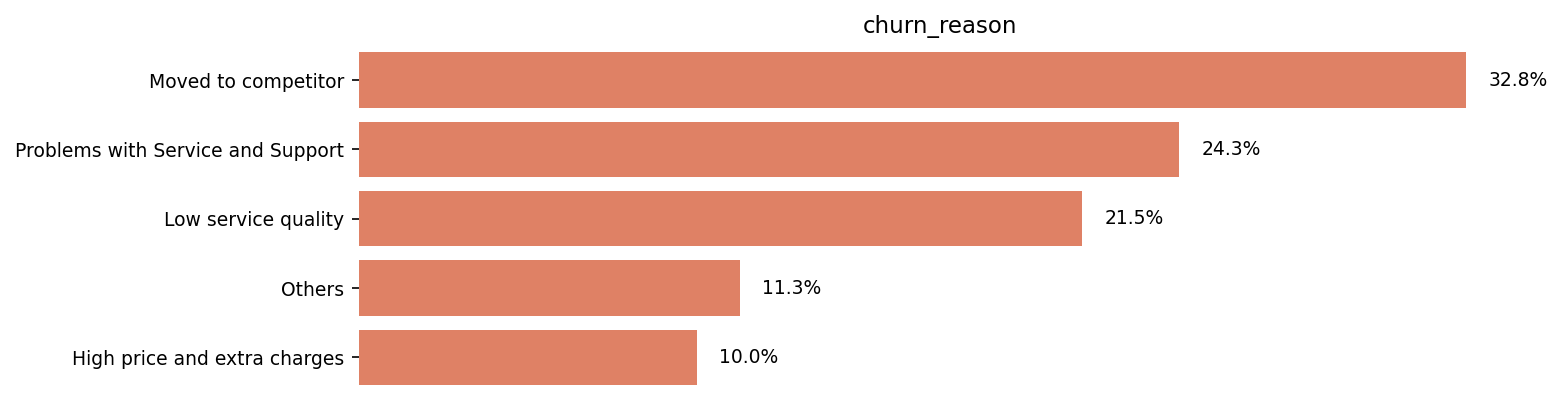

In [161]:
eda_plots(train_copy, ['churn_reason'], 1, 1, (10, 3), plot_type = 'bar', target='churn', target_value=1)

The top reason for customers leaving is "Moved to competitor," accounting for 32.8% of the churn. This indicates that a significant portion of customers found better offers or services with other companies. The second most common reason is "Problems with Service and Support" at 24.3%, suggesting that issues with customer service, technical support, or overall provider attitude are a major concern. "Low service quality" follows closely at 21.5%, which points to dissatisfaction with the core product itself, such as network reliability or data speeds.

Finally, "High price and extra charges" accounts for 10.0% of churn, showing that while pricing is a factor, it is less significant than competitor offerings and service-related issues. The remaining reasons are grouped under "Others," making up 11.3% of the total.

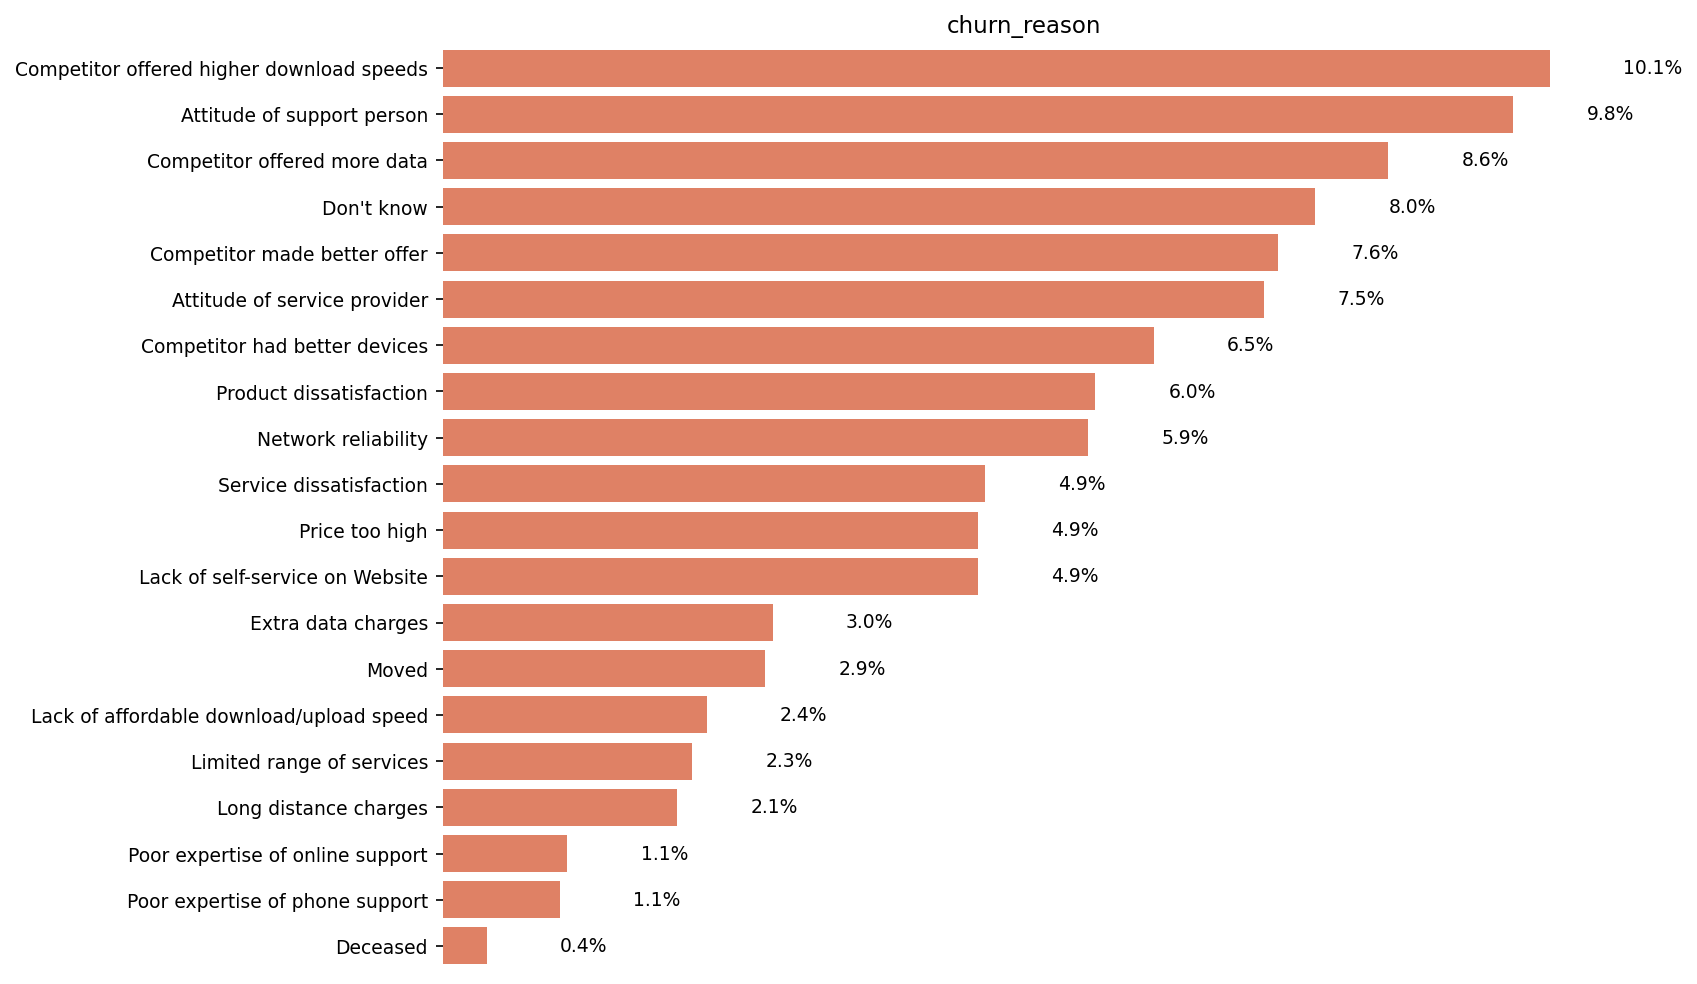

In [162]:
eda_plots(train, ['churn_reason'], 1, 1, (10, 8), plot_type = 'bar', target='churn', target_value=1)

This detailed analysis reveals that churn is driven by a combination of factors, with competitive advantages (higher speeds, more data, better offers) and service-related issues (support staff attitude, overall service provider attitude, product dissatisfaction) being the most impactful. Pricing is a contributing factor, but it is less prominent than the core issues of network performance and customer support.

### Key Findings 
- The most significant reason for churn is "Competitor offered higher download speeds," accounting for 10.1% of departures. This indicates that network performance is a key competitive differentiator and a major pain point for customers.
- The second most frequent reason is "Attitude of support person" at 9.8%, closely followed by "Competitor offered more data" at 8.6%. This highlights the dual importance of both customer service quality and competitive data plans in retaining customers.
- Other notable reasons include "Don't know" (8.0%), "Competitor made better offer" (7.6%), and "Attitude of service provider" (7.5%). The high percentage of "Don't know" responses suggests a potential gap in data collection or that some customers may not be able to pinpoint a single reason for leaving.

# Conclusion

In this notebook, we have completed the following steps:

- Descriptive Data Analysis: We conducted a descriptive analysis of the data, which allowed us to understand the nature and importance of each column within the provided dataframe. During this phase, we identified and corrected several inconsistencies, and made modifications that were essential for the subsequent steps.

- Exploratory Data Analysis (EDA): The exploratory analysis provided a clear understanding of the company's customer profile and helped us identify the potential reasons for the high churn rate. With this information, we have successfully addressed the first of the two objectives outlined for this project: Identify the potential reasons for customer churn.

We will now proceed with the second objective: the construction of a predictive model.